# Credit Card Fraud Detection

In [1]:
# Install xgboost (eXtreme Gradient Boosting)
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 11.9 MB/s eta 0:00:06
   -- ------------------------------------- 4.7/72.0 MB 14.6 MB/s eta 0:00:05
   ---- ----------------------------------- 8.4/72.0 MB 15.5 MB/s eta 0:00:05
   ------- -------------------------------- 13.9/72.0 MB 18.6 MB/s eta 0:00:04
   ----------- ---------------------------- 19.9/72.0 MB 21.0 MB/s eta 0:00:03
   --------------- ------------------------ 28.3/72.0 MB 24.1 MB/s eta 0:00:02
   -------------------- ------------------- 37.7/72.0 MB 27.1 MB/s eta 0:00:02
   ------------------------- -------------- 46.1/72.0 MB 28.7 MB/s eta 0:00:01
   ------------------------------ --------- 55.6/72.0 MB 30.5 MB/s eta 0:00:01
   ---------------------------------- ----- 62.1/72.0 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 31.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 31.9 MB

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns # used for creating attractive and informative statistical graphis

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

# Step 2: Load Datasets

In [10]:
url = "https://raw.githubusercontent.com/programmer-sahil/Ardent_ML_Training/main/Project%206/creditcard_synthetic.csv"
df = pd.read_csv(url)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.496714,-0.143423,-1.980572,1.049782,0.078838,-0.878442,0.960895,-0.036194,-0.218650,-1.303106,1.369878,0.255038,0.412781,-0.174362,-0.538522,0.032438,0.276511,-0.703024,-0.746091,-1.244839,-1.399822,1.451702,-0.336691,-0.057255,0.077838,-1.355097,0.491754,0.472624,10.357252,0
1,-0.138264,-0.032656,-1.054986,-0.780533,0.562897,0.618881,-0.369965,0.262368,0.382939,0.491719,-0.108265,-0.152038,1.773199,-0.713328,2.292061,-0.778078,1.043696,1.081171,0.757040,1.085824,0.547823,-2.544824,-0.172722,0.003785,-0.104032,-1.390843,0.608266,-1.003026,102.655124,0
2,0.647689,0.064295,-0.587028,1.199404,0.341102,-1.128860,-0.579581,0.231320,0.735142,2.675943,-1.083087,-1.106249,-1.523971,0.018782,-1.504112,-1.202091,0.003883,-0.377822,-0.427880,-2.535872,-0.120762,-0.507405,-0.409764,-1.335593,-0.186949,-0.048285,0.762813,0.134237,42.913457,0
3,1.523030,0.946861,0.149669,-0.061126,-1.277914,1.157451,0.933312,0.676311,-1.183365,-1.505715,1.391961,0.730613,-0.183776,2.091861,1.375205,0.697539,-1.038205,0.619661,2.228718,-0.326310,-0.283264,-0.132601,0.104254,-0.110330,-1.396816,-0.301422,0.011597,0.870338,22.044645,0
4,-0.234153,-0.747217,1.024162,0.856153,-0.186220,-0.747813,-2.731540,-0.909161,0.100739,-0.828139,-0.113177,0.699477,-0.102585,0.128138,0.325901,0.379631,1.176187,1.563962,-0.113275,-0.292503,0.767569,-0.231831,-0.814684,0.288094,-0.395986,-0.585248,0.797576,1.419409,13.049885,0


# Step 3: Check Basic Info

In [12]:
print(df.shape)
print(df['Class'].value_counts())

(15000, 30)
Class
0    14895
1      105
Name: count, dtype: int64


# Step 4: Class Distribution Validation

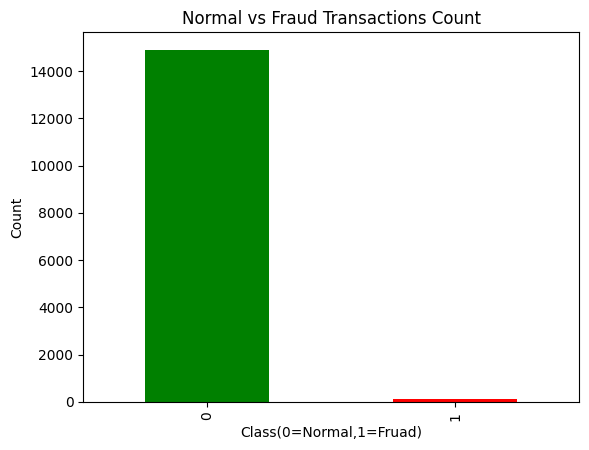

In [14]:
df['Class'].value_counts().plot(kind='bar',color=['green','red'])
plt.title("Normal vs Fraud Transactions Count")
plt.xlabel("Class(0=Normal,1=Fruad)")
plt.ylabel("Count")
plt.show()

# Step 5: Feature & Target Separation

In [15]:
x = df.drop('Class', axis=1)
y = df['Class']

# Step 6: Train Test Split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 7: Model-1: Random Forest

In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1 
)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

# Step 8: RF Prediction & Metrics

In [19]:
y_pred_rf = rf.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred_rf)
prec_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
auc_rf = roc_auc_score(y_test,rf.predict_proba(x_test)[:,1])

print ("Random Forest Metrics:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("ROC_AUC:", auc_rf)

Random Forest Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC_AUC: 0.5035726274396969


C:\Users\MAYUSHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Step 9: Confusion Matrix Visualization

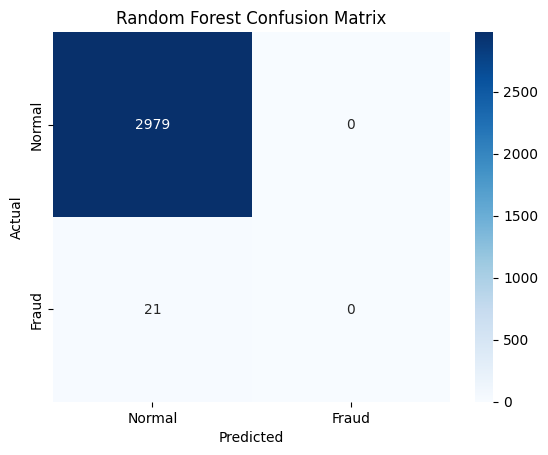

In [20]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# STEP-10: MODEL-2 → XGBOOST

In [23]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss',
    n_jobs=-1

)

xgb.fit(x_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

# Step 11: XGB Prediction & Metrics

In [29]:
y_pred_xgb = xgb.predict(x_test)

acc_xgb =  accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb =  f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb.predict_proba (x_test) [:,1])

print("XGBoost Metrics:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC-AUC:", auc_xgb)

XGBoost Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.4580795728831982


C:\Users\MAYUSHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Step 12: Feature Importance(XGBOOST)

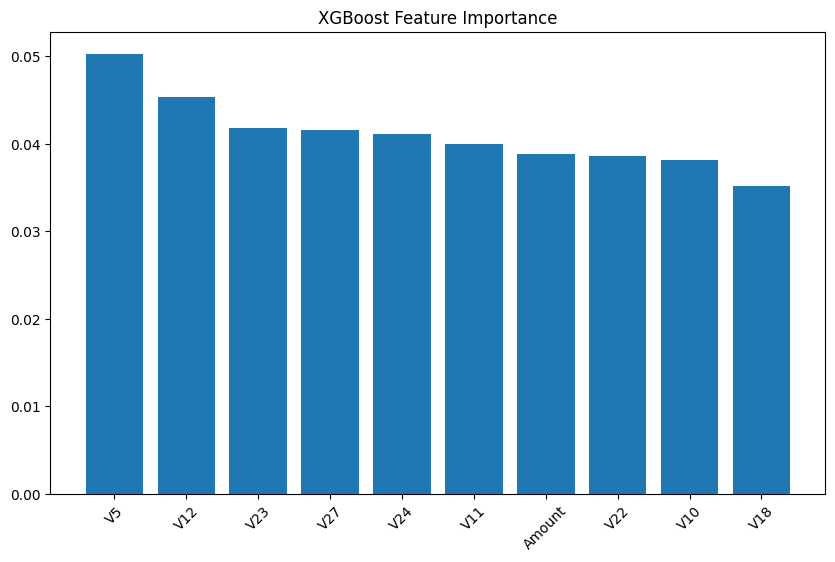

In [33]:
importances = xgb.feature_importances_
indices = np.argsort(importances) [::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost Feature Importance")
plt.bar(range (10), importances [indices] [:10])
plt.xticks(range (10), x.columns[indices] [:10], rotation=45)
plt.show()